In [44]:
from qiskit.quantum_info import Statevector

dir(Statevector)

import qiskit
qiskit.__version__

'1.2.0'

# Qiskit 스터디 1-12주차 일정

## Week 1: 기초 복습 및 심화
### 문제 1: "2큐비트 가산기"
```python
# 두 개의 단일 비트를 더하는 양자 가산기를 구현하세요.
# 입력: |a⟩|b⟩|0⟩ (a,b는 각각 0 또는 1)
# 출력: |a⟩|b⟩|s⟩ (s는 a+b의 결과)

# 요구사항:
# 1. 덧셈 결과 s와 캐리 비트 c를 모두 출력
# 2. 다음 입력들에 대해 테스트하고 결과 확인:
#    - |0⟩|0⟩|0⟩ → |0⟩|0⟩|0⟩
#    - |0⟩|1⟩|0⟩ → |0⟩|1⟩|1⟩
#    - |1⟩|1⟩|0⟩ → |1⟩|1⟩|0⟩ (캐리 비트 1)
# 3. 회로도와 측정 결과를 히스토그램으로 표시
```

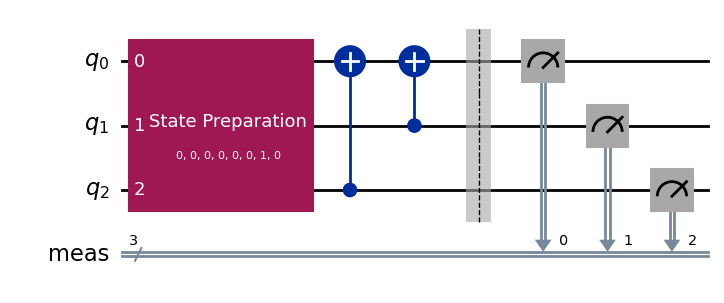

In [45]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram

adder = input()
state = Statevector.from_label(adder)
qc = QuantumCircuit(3)
qc.prepare_state(state, [0, 1, 2])

qc.cx(2,0)
qc.cx(1,0)
qc.measure_all()
qc.draw('mpl')

input =  110


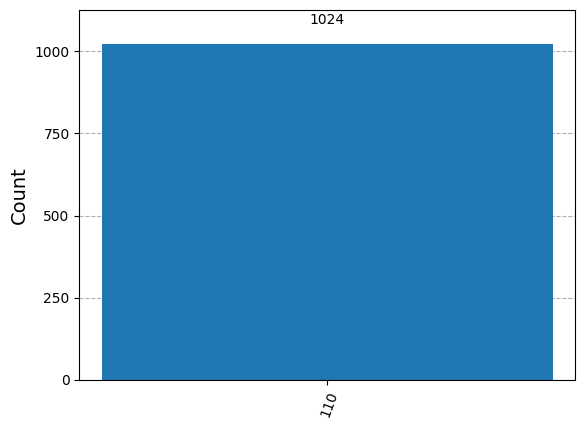

In [46]:
simulator = QasmSimulator()

compiled_circuit = transpile(qc, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts()
print("input = ", adder)
plot_histogram(counts)

### 문제 2: "GHZ vs W 상태"
```python
# 3큐비트 시스템에서 GHZ 상태와 W 상태를 생성하고 비교하세요.
# GHZ 상태: |GHZ⟩ = (|000⟩ + |111⟩)/√2
# W 상태: |W⟩ = (|001⟩ + |010⟩ + |100⟩)/√3

# 요구사항:
# 1. 두 상태를 각각 생성하는 회로 구현
# 2. 각 상태에 대해 다음 측정 수행:
#    - 모든 큐비트를 Z-기저로 측정
#    - 모든 큐비트를 X-기저로 측정
# 3. 각 상태의 밀도 행렬을 구하고 시각화
# 4. 한 큐비트를 잃어버렸을 때 두 상태의 차이점 분석
```

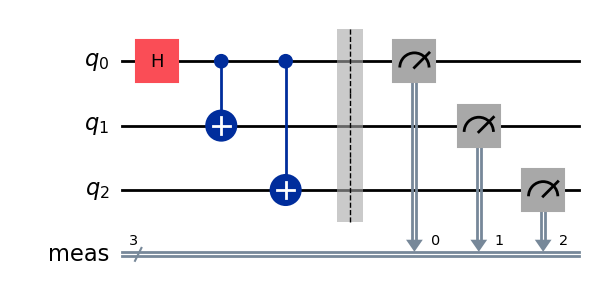

In [19]:
ghz = QuantumCircuit(3)

ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)

ghz.measure_all()

ghz.draw('mpl')


Total count for 000 and 111 are: {'111': 500, '000': 524}


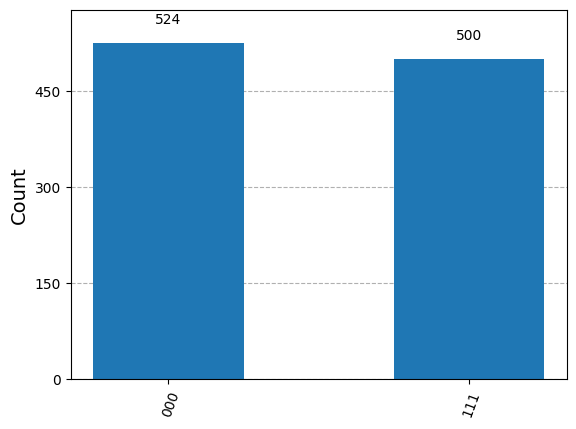

In [22]:
simulator = QasmSimulator()
compiled_circuit = transpile(ghz, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal counts:", counts)

plot_histogram(counts)

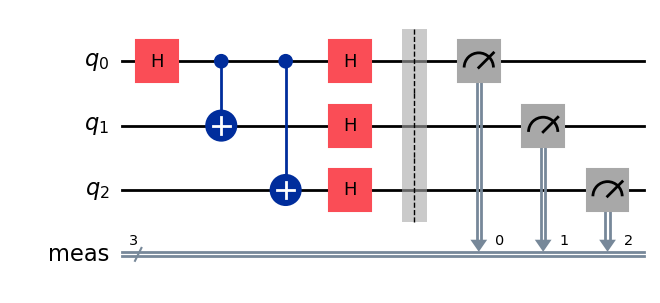

In [24]:
# measurements in x-basis

ghz = QuantumCircuit(3)

ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)
ghz.h(0)
ghz.h(1)
ghz.h(2)

ghz.measure_all()

ghz.draw('mpl')


Total count for 000 and 111 are: {'110': 244, '101': 248, '000': 266, '011': 266}


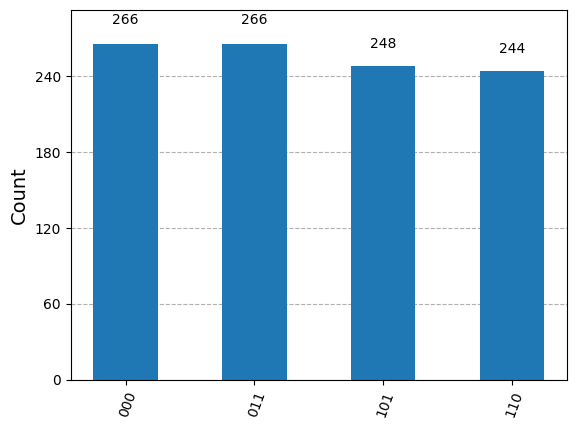

In [25]:
simulator = QasmSimulator()
compiled_circuit = transpile(ghz, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal counts :", counts)

plot_histogram(counts)

# 000 means +++, 001 means ++-, and so on

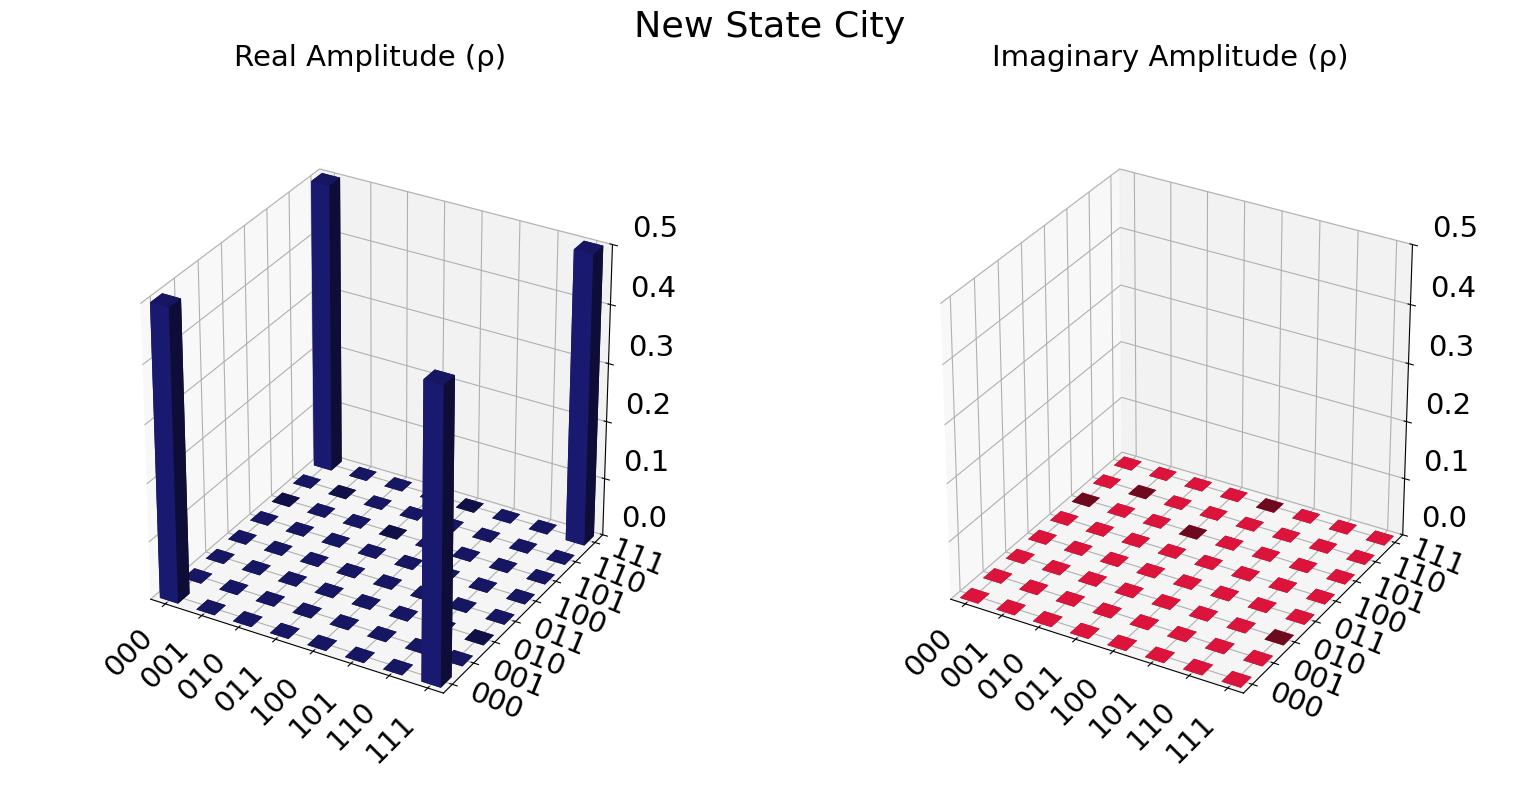

In [33]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

ghz = QuantumCircuit(3)

ghz.h(0)
ghz.cx(0,1)
ghz.cx(0,2)

state = DensityMatrix(ghz)
plot_state_city(state, color=['midnightblue', 'crimson'], title="GHZ Density Matrix")

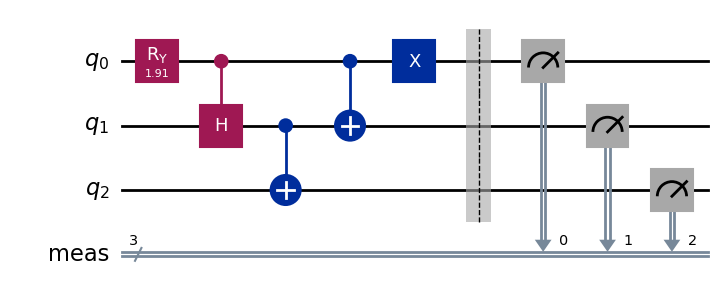

In [29]:
import numpy as np

w = QuantumCircuit(3)

theta = 2*np.arccos(1/np.sqrt(3))
w.ry(theta, 0)
w.ch(0,1)
w.cx(1,2)
w.cx(0,1)
w.x(0)

w.measure_all()

w.draw('mpl')


Total counts : {'100': 335, '001': 348, '010': 341}


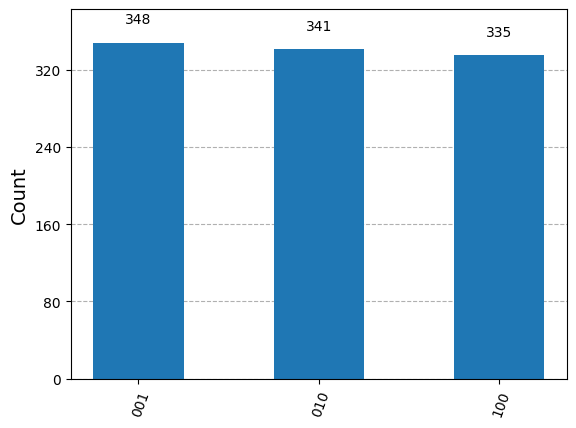

In [30]:
simulator = QasmSimulator()
compiled_circuit = transpile(w, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal counts :", counts)

plot_histogram(counts)

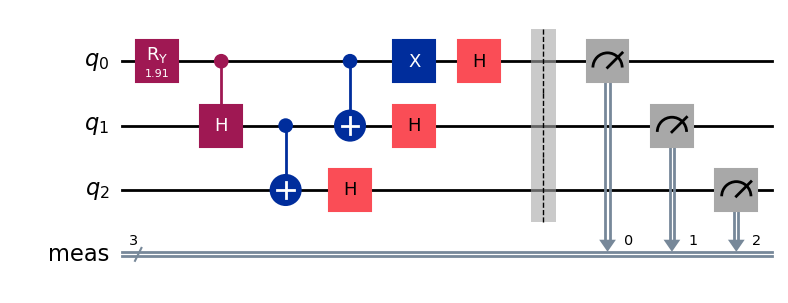

In [31]:
# measurements in x-basis

w = QuantumCircuit(3)

theta = 2*np.arccos(1/np.sqrt(3))
w.ry(theta, 0)
w.ch(0,1)
w.cx(1,2)
w.cx(0,1)
w.x(0)
w.h(0)
w.h(1)
w.h(2)

w.measure_all()

w.draw('mpl')


Total counts : {'111': 372, '000': 395, '001': 35, '101': 50, '110': 47, '011': 40, '100': 45, '010': 40}


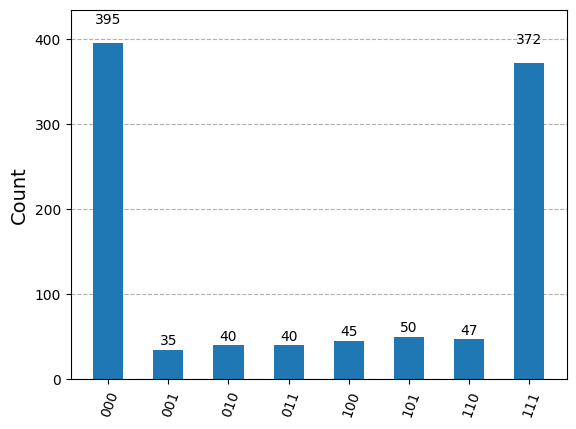

In [32]:
simulator = QasmSimulator()
compiled_circuit = transpile(w, simulator)

job = simulator.run(compiled_circuit, shots=1024)

result = job.result()

counts = result.get_counts(compiled_circuit)
print("\nTotal counts :", counts)

plot_histogram(counts)

# 000 means +++, 001 means ++-, and so on

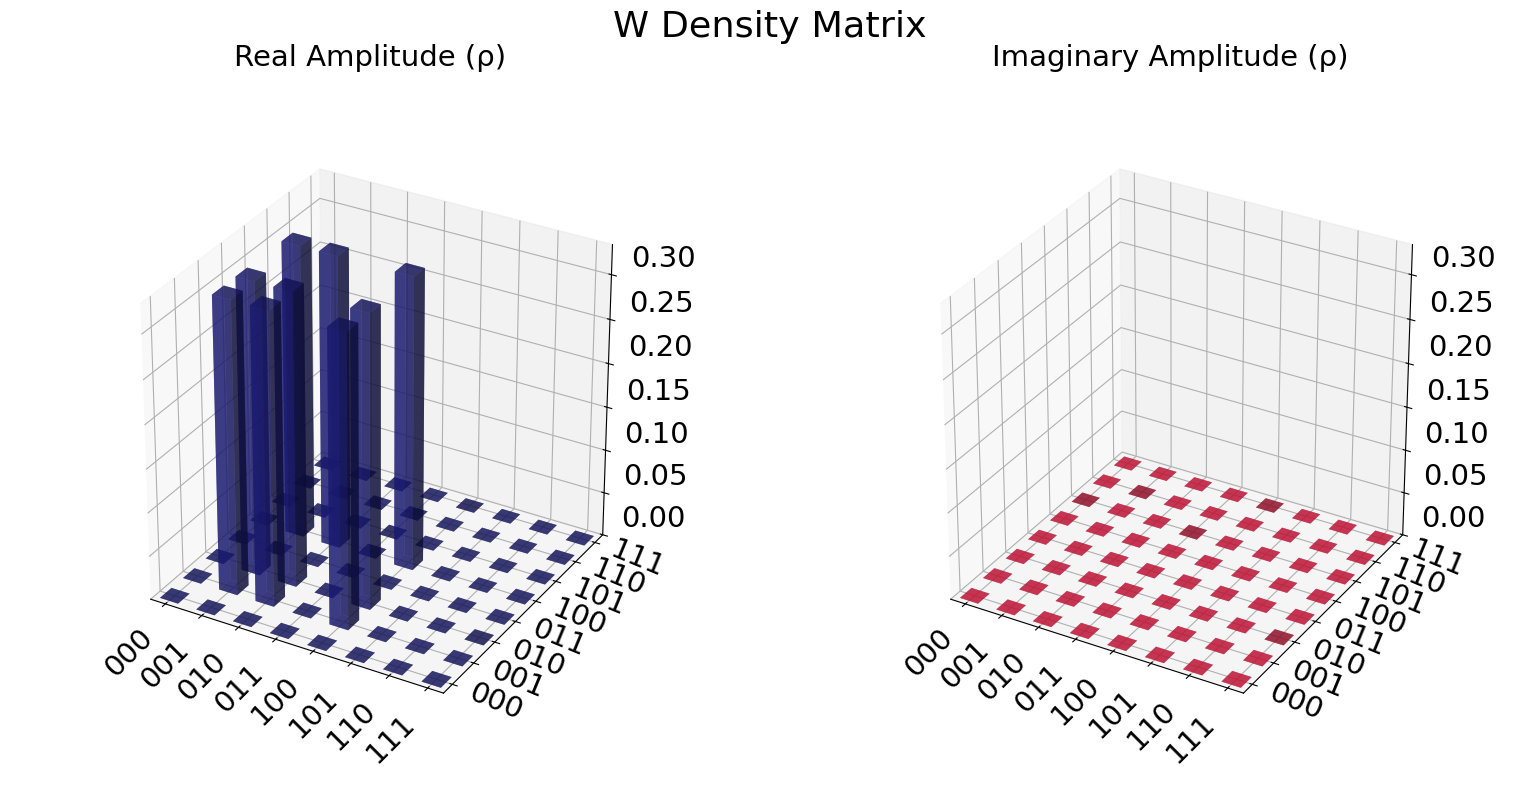

In [35]:
w = QuantumCircuit(3)

theta = 2*np.arccos(1/np.sqrt(3))
w.ry(theta, 0)
w.ch(0,1)
w.cx(1,2)
w.cx(0,1)
w.x(0)

state = DensityMatrix(w)
plot_state_city(state, alpha=0.6, color=['midnightblue', 'crimson'], title="W Density Matrix")

This difference is, for example, illustrated by the following interesting property of the W state: if one of the three qubits is lost, the state of the remaining 2-qubit system is still entangled. This robustness of W-type entanglement contrasts strongly with the GHZ state, which is fully separable after loss of one qubit.

### 문제 3: "양자 상태 전송"
```python
# A가 B에게 임의의 2큐비트 상태를 다음 과정으로 전송하세요:
# |ψ⟩ = α|00⟩ + β|01⟩ + γ|10⟩ + δ|11⟩

# 요구사항:
# 1. 다음 세 가지 특정 상태에 대해 전송 구현:
#    - |ψ1⟩ = (|00⟩ + |11⟩)/√2
#    - |ψ2⟩ = (|01⟩ + |10⟩)/√2
#    - |ψ3⟩ = (|00⟩ + |01⟩ + |10⟩ + |11⟩)/2
# 2. 각 전송에 대해 상태 토모그래피 수행
# 3. 충실도(fidelity) 계산 및 85% 이상 달성
```

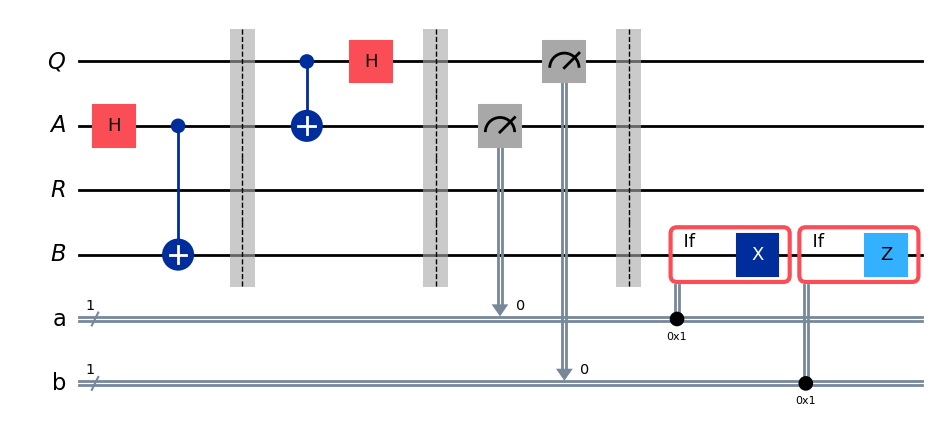

In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

qbit0 = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
qbit1 = QuantumRegister(1, "R")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qbit0, ebit0, qbit1, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qbit0, ebit0)
protocol.h(qbit0)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qbit0, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw('mpl'))

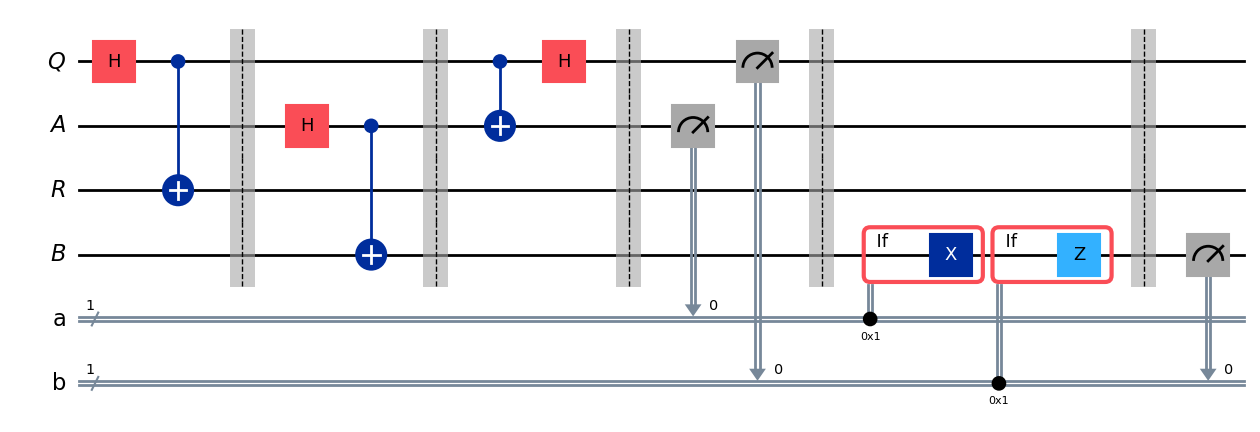

In [41]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qbit0, ebit0, qbit1, ebit1, a, b)

# Start with the randomly selected gate on Q

test.h(0)
test.cx(0,2)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

test.measure(ebit1, b)

display(test.draw('mpl'))

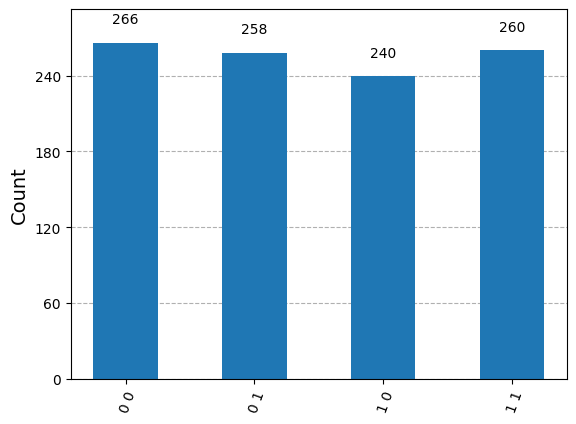

In [42]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
plot_histogram(statistics)